# テスト

In [397]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [398]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

data = np.array([
    [166.0, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])

x = data[:, 0]
y = data[:, 1]

inputs = torch.tensor((x - x.min()) / (x.max() - x.min())).view(-1, 1).float()
labels = torch.tensor((y - y.min()) / (y.max() - y.min())).view(-1, 1).float()
n_input = 1
n_output = 1

net = Net(n_input, n_output)
outputs = net(inputs)


In [399]:
for param in net.named_parameters():
    print(param)

('l1.weight', Parameter containing:
tensor([[0.7645]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([0.3688], requires_grad=True))


In [400]:
criterion = nn.MSELoss()
loss = criterion(outputs, labels)
loss.backward()


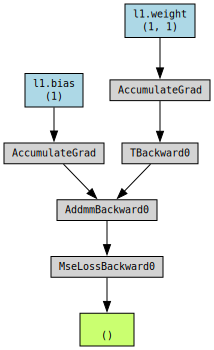

In [401]:
import torch.optim as optim
from torchviz import make_dot

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [402]:
#optimizer.step()
optimizer.zero_grad()

In [403]:
num_epochs = 100

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 20 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.3f}')


Epoch / Loss = 0 / 0.077
Epoch / Loss = 20 / 0.061
Epoch / Loss = 40 / 0.043
Epoch / Loss = 60 / 0.032
Epoch / Loss = 80 / 0.026


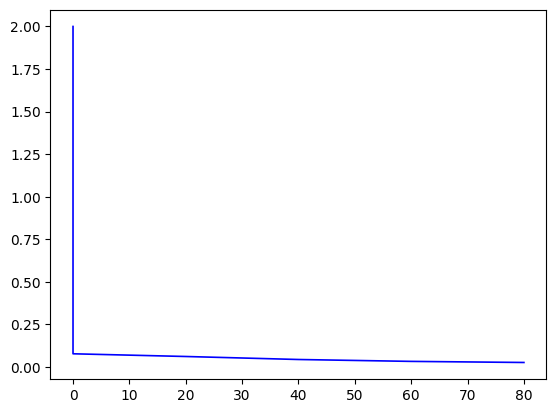

In [404]:
plt.plot(history[:, 0], history[:, 1], 'b')

In [405]:
print(f'{net.l1.weight} / {net.l1.bias}')

Parameter containing:
tensor([[0.6951]], requires_grad=True) / Parameter containing:
tensor([0.1573], requires_grad=True)


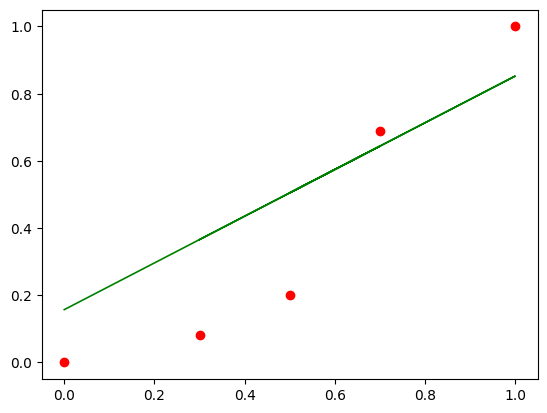

In [406]:
plt.scatter(inputs.data.numpy(), labels.data.numpy())
plt.plot(inputs.data.numpy(), net(inputs).data.numpy(), c='g')
